# PCA 主成分分析

维度：就是 .ndim 返回的值

In [1]:
import numpy as np

In [2]:
a = np.zeros((3,4))
print(a.ndim)

2


维度也代表了训练数据中特征向量的个数

**pca 采用信息量衡量指标，即样本方差，** 或称为可解释性方差，方差越大，所携带信息量越多。

$$ Var = \frac{1}{n-1}\sum_{i=1}^{n} {(x_i - \hat{x})^2} $$

为什么是 $\frac{1}{n-1}$ 而不是 $\frac{1}{n}$ ? 因为为了得到样本方差的无偏估计，证明在 GaussianDistribution 文件中

### 高维数据可视化
以莺尾花数据集为例

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
x = iris.data
y = iris.target

二维数组，四维特征矩阵(四个特征)

In [5]:
x.shape

(150, 4)

用 PCA 降维 4 -> 2

In [6]:
pca = PCA(n_components=2)
pca = pca.fit(x)
x_dr = pca.transform(x)

In [7]:
x_dr.shape

(150, 2)

简便写法

In [8]:
x_dr_1 = PCA(2).fit_transform(x)

In [9]:
x_dr_1.shape

(150, 2)

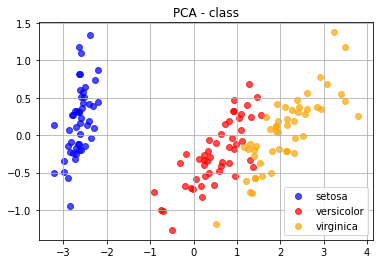

In [10]:
plt.figure()
plt.scatter(x_dr[y == 0,0], x_dr[y == 0,1], c='b', label=iris.target_names[0], alpha=0.7)
plt.scatter(x_dr[y == 1,0], x_dr[y == 1,1], c='r', label=iris.target_names[1], alpha=0.7)
plt.scatter(x_dr[y == 2,0], x_dr[y == 2,1], c='orange', label=iris.target_names[2], alpha=0.7)
plt.title('PCA - class')
plt.grid();plt.legend()
plt.show()

查看每个新特征的信息量(可解释性方差)大小

In [11]:
pca.explained_variance_

array([4.22824171, 0.24267075])

查看每个新特征信息量占原始信息量的百分比(可解释性方差贡献率)

In [12]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

在 PCA 的参数中，n_components 默认为 min(x.shape)，一般为 feature 个数，相当于没有降维，只是转换了新的坐标空间。

常用来画出累计可解释性方差贡献曲线，帮助我们决定最好的 n_components 的个数

In [13]:
pca_line = PCA().fit(x)

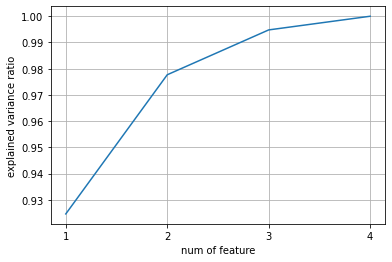

In [14]:
plt.figure()
plt.plot([1,2,3,4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel('num of feature');plt.ylabel('explained variance ratio')
plt.grid()
plt.show()

n_components 参数还可以选择极大似然估计 mle，这时系统会自动帮我们选取最优的个数

In [15]:
x_mle = PCA(n_components='mle').fit_transform(x)
x_mle.shape

(150, 3)

上面一行代码可知，mle 自动选择了 3 作为降维后的 feature 个数。

n_components 参数还可以选择 0-1 之间的浮点数，代表了降维后希望保留百分之多少的信息量

此时必须加上 svd_solver='full' 这个参数

In [16]:
x_f = PCA(n_components=0.97, svd_solver='full').fit_transform(x)
x_f.shape

(150, 2)

In [17]:
x_f = PCA(n_components=0.99, svd_solver='full').fit_transform(x)
x_f.shape

(150, 3)

### 人脸识别中 components_

In [18]:
from sklearn.datasets import fetch_lfw_people

In [19]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [21]:
faces.data.shape

(1348, 2914)

In [22]:
faces.images.shape

(1348, 62, 47)

其中 1348 是样本个数，62 是特征矩阵行数，47 是特征矩阵列数，data 实际上就是拉平了

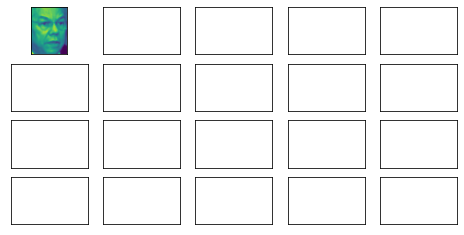

In [30]:
fig, axes = plt.subplots(4,5,
                        figsize=(8,4),
                        subplot_kw={'xticks':[],'yticks':[]})
axes[0][0].imshow(faces.images[0,:,:])

In [29]:
axes[0][0].imshow(faces.images[0,:,:])